![alt text](https://cdn3.iconfinder.com/data/icons/bebreezee-weather-symbols/690/icon-weather-sunrainheavy-512.png)
# <p style="text-align: center;"> Predicting Weather Based on Kaggle Data  </p>
<p style="text-align: center;"> Colin Chen, Bryan Hiew, Jesse Wu </p>
<p style="text-align: center;"> December 15, 2018 </p>
<p style="text-align: center;"> CMSC320</p>

### Introduction
---
The Earth's weather is one of the world's greatest mysteries. While it seems simple to predict the weather for the next few days, it is actually very hard to accurately predict the weather in the far future. Countless entities such as The Weather Channel, weather.com, accuweather.com, etc. all throw millions of dollars to go toward creating weather models in order to ultimately predict the weather. To this day these companies still have a hard time of predicting the weather in the long run. We will be joining these companies in efforts to foresee the weather. 

In this tutorial, we will be using a dataset from Kaggle, which is a fantastic resource if you want to get started with Data Science projects - they have a huge variety of datasets to choose from and projects done by others that you can learn from! We decided to use a weather dataset provided by "Muthukumar.J" which contains information about temperature, humiditiy, pressure, etc. at every hour of the day starting from April 1, 2006 to the end of 2016 at some location not disclosed. The dataset can be found at: https://www.kaggle.com/muthuj7/weather-dataset?fbclid=IwAR093Z5YSZqoOOLRwsiN7rmS0exWFZYUz2Nk3pBZVeHUguuV_BDTlJ8Vzzo#weatherHistory.csv

Our goal is to tidy the data that we are given, to perform an exploratory data analysis to find statistical trends and display them with graphs, and to make predictions about future trends about the temperature. 

### Getting Started
---
We will be using [Python 3](https://www.python.org/download/releases/3.0/) and a few Python libraries: 

- [pandas](https://pandas.pydata.org/)
- [seaborn](https://seaborn.pydata.org/)
- [Matplotlib](https://matplotlib.org/)
- [Scikit](https://scikit-learn.org/stable/)


In [45]:
# Importing our libraries. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Importing our .csv file that contains our dataset. 
data = pd.read_csv('weatherHistory.csv')

### Data Tidying
We are using pandas to help us tidy our data. The library offers a data structure called "Dataframes" which will easily allow us to prune and pick data that we wish to use. What we have done here with our one line of non-import code above is read our .csv file into a pandas Dataframe. As you can see, pandas has pulled all the columns and rows and filled them into the Dataframe accordingly. 

In [46]:
# Displaying the first five rows of our dataframe. 
data.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


The columns indicate that the dataset gives us information on many aspects of the weather.  However, most of the time you don't need _everything_ that comes with your dataset. In our case, we will be removing the 'Summary', 'Daily Summary', 'Loud Cover', 'Wind Bearing (degrees)', 'Visibility (km)', 'Apparent Temperature (C)' columns, as we won't be utilizing them in this tutorial. We will only be using the 'Formatted Date', 'Precip Type', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', and 'Pressure (millibars)' columns. 

In [47]:
columns = [
'Summary',
'Daily Summary',
'Loud Cover',
'Wind Bearing (degrees)',
'Visibility (km)',
'Apparent Temperature (C)'
]

#Dropped unncessary columns. Don't run again or it will fail 
data = data.drop(columns=columns)
data.head(5)

,Formatted Date,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,0.89,14.1197,1015.13
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,0.86,14.2646,1015.63
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,0.89,3.9284,1015.94
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,0.83,14.1036,1016.41
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,0.83,11.0446,1016.51


Now that we have reduced the type of data that we want to use, we should also "clean" the data. Most of the time this will include figuring out how to account for missing data and reacting to missing data accordingly. If you open up the .csv file in Microsoft Excel and scroll down far enough, you'll realize that in the 'Precip Type' column, there are some data points that say "other" (there is very few, so it would appear that whoever made this dataset lives in a place where it constantly rains or snows!). This doesn't tell us much about the precipitation type at the time, so we'll only include the rows that have either "Rain" or "Snow". 



In [48]:
#Remove 'other' precipitation type
data = data.loc[data['Precip Type'].isin(['rain','snow'])]

Next, we want to make sure everything in our Dataframe is well-formatted and easy to read. It is pretty easy to tell that on the first column that the humidity levels are 89%. However, on the formatted date, it is a little bit cluttered with unnecessary information, such as the timezone '+0200'. Let's clean that up so that the date's are more readable, e.g. 2006-04-01

In [49]:
#Remove the unnecessary parts of the formatted date
date_col = []
for index, row in data.iterrows():
    date_string = row['Formatted Date']
    split_date = date_string.split(' ')
    date_col.append(split_date[0])
data['Formatted Date'] = date_col
data = data.rename({'Formatted Date':'Date'},axis='columns')
data.head(5)

,Date,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
0,2006-04-01,rain,9.472222,0.89,14.1197,1015.13
1,2006-04-01,rain,9.355556,0.86,14.2646,1015.63
2,2006-04-01,rain,9.377778,0.89,3.9284,1015.94
3,2006-04-01,rain,8.288889,0.83,14.1036,1016.41
4,2006-04-01,rain,8.755556,0.83,11.0446,1016.51


In our dataset, we have one data entry per hour, rather than by day. This means that for any given day, we have 24 rows containing data for that day. It would make much more sense to have data per day, and it would reduce the number of rows in our Dataframe. We represent each column per day by averaging every row corresponding to that day and combining them. 

Initially our dataset comprised of approximately 95,000 entries with 11% being categorized under "snow". After we merged the data, we reduced it to 4,000 rows also with 11% being categorized under "snow". This means that we are maintaining the overall percentage of the dataset and not losing much data. 

The final step in our data tidying and modification is going to be the addition of a new column named 'Season'. This is because temperatures tend to be different throughout the year so it would make sense to keep track of what season the data is at. 

Our data is now tidy and we can easily see data per day. For example, on April 1, 2006, it rained, had an average humidity of 72.6%, had an average temperature of 12.62 Celcius, the an average wind speed of 14.1 km/h, an average pressure of 1016 millibars, and was part of the Spring season.


In [51]:
#Average the temperature and humidity per day
precip_dict = {'rain':1, 'snow':2}

season_dict = {
              "01":"winter", "02":"winter", "03":"spring", 
              "04":"spring", "05":"spring", "06":"summer",
              "07":"summer", "08":"summer", "09":"autumn",
              "10":"autumn", "11":"autumn", "12":"winter",
             }

#Average variables for all data
curr_date = data['Date'][0]
avg_temp = 0
avg_humidity = 0
avg_precip = 0
avg_pressure = 0
avg_windspeed = 0
date_count = 0

#Arrays for all day
date_col = []
temp_col = []
humid_col = []
pressure_col = []
precip_col = []
windspeed_col = []
season_col = []

# Iterate through all the rows. 
for index, row in data.iterrows():
    #If the date is the same add to average
    if row['Date'] == curr_date:
        avg_temp += row['Temperature (C)']
        avg_humidity += row['Humidity']
        avg_precip += precip_dict[row['Precip Type']]
        avg_pressure += row['Pressure (millibars)']
        avg_windspeed += row['Wind Speed (km/h)']
        date_count += 1
    #Once the date changes, average and add to the lists
    else:
        date_col.append(curr_date)
        temp_col.append(avg_temp/date_count)
        pressure_col.append(avg_pressure/date_count)
        humid_col.append(avg_humidity/date_count)
        windspeed_col.append(avg_windspeed/date_count)
        season_col.append(season_dict[row["Date"].split('-')[1]])
        #If the avg_precip is <=1.5 we considered it "rain" else it's "snow"
        if (avg_precip/date_count) <= 1.5:
            precip_col.append('rain')
        else:
            precip_col.append('snow')

        curr_date = row['Date']

        avg_temp = row['Temperature (C)']
        avg_humidity = row['Humidity']
        avg_precip = precip_dict[row['Precip Type']]
        avg_pressure = row['Pressure (millibars)']
        avg_windspeed = row['Wind Speed (km/h)']
        date_count = 0

# New column names. 
cleaned_data = {
'Date': date_col,
'Precipitation Type': precip_col,
'Humidity': humid_col,
'Temperature (C)': temp_col,
'Pressure (millibars)': pressure_col,
'Wind Speed (km/h)': windspeed_col,
'Season': season_col,
}

data = pd.DataFrame(data=cleaned_data)
data.head(5)

,Date,Precipitation Type,Humidity,Temperature (C),Pressure (millibars),Wind Speed (km/h),Season
0,2006-04-01,rain,0.726667,12.626852,1016.450000,12.172942,spring
1,2006-04-10,rain,0.626087,14.798068,1055.701304,19.152000,spring
2,2006-04-11,rain,0.868261,12.912560,1049.312609,15.595300,spring
3,2006-04-12,rain,0.840000,8.734541,1048.305652,23.171400,spring
4,2006-04-13,rain,0.768261,7.845169,1053.402609,11.582900,spring


### Exploratory Data Analysis
---

Now that we have tidied the data into something that we can more easily work with, we can now move on to the Exploratory Data Analysis. We will be graphing certain aspects of the dataset using SeaBorn and Matplotlib. 

#### Graphing Temperature Over Time

Global Warming is an issue that has been widely discussed throughout the world. We will graph Temperature vs. Time, with time being the number of days since April 1, 2006 to see if there is any evidence of temperature increase in the location that the author recorded the data in. 

We separated the points by season in order to more accurately see the trends in the temperature. They appear fairly consistent throughout the 4000 days, merely bouncing up and down by a few degrees. 



Text(0.5,1,'Temperature over Time Since 04/01/06')

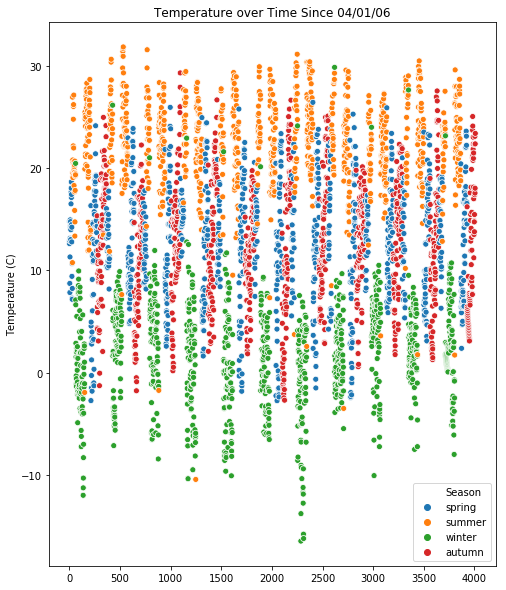

In [58]:
plt.figure(figsize=(8,10,))
temp_plt = sns.scatterplot(x=range(data.shape[0]), y='Temperature (C)', hue='Season', data=data)
plt.title('Temperature over Time Since 04/01/06')

### Graphing Humidity Over Time

We can do the same for humidity. It would appear that the location has a fairly consistent humidity regardless of season.

Text(0.5,1,'Humidity over Time Since 04/01/06')

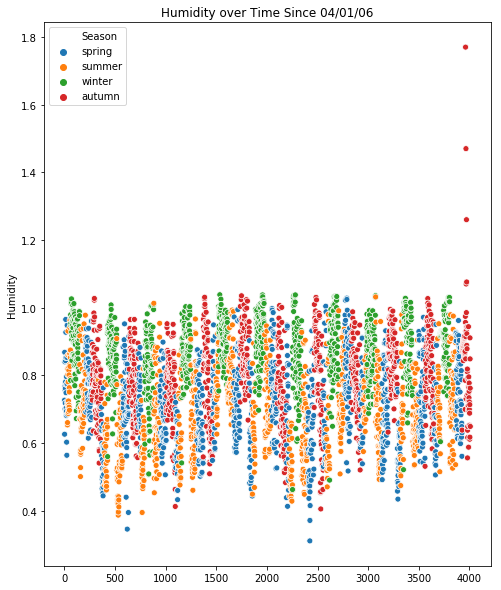

In [60]:
plt.figure(figsize=(8,10,))
humid_plt = sns.scatterplot(x=range(data.shape[0]), y='Humidity', hue='Season', data=data)
plt.title('Humidity over Time Since 04/01/06')

### Graphing Wind Speed Over Time

Doing the same with wind speed. You can see that wind speed is a little bit more spread out that humidity, which means that on any given day, the wind speed may be very high. 

Text(0.5,1,'Wind Speed over Time Since 04/01/06')

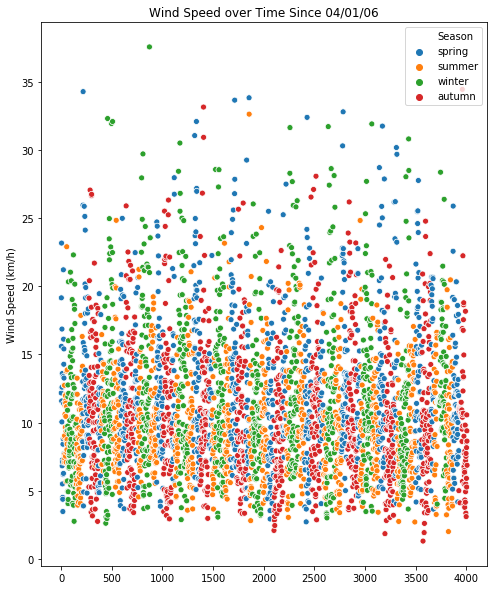

In [64]:
plt.figure(figsize=(8,10,))
windspeed_plot = sns.scatterplot(x=range(data.shape[0]), y='Wind Speed (km/h)', hue='Season', data=data)
plt.title('Wind Speed over Time Since 04/01/06')

### Boxplots - Another Way to View Your Data

SeaBorn can also create boxplots to display your data. We create three box plots showing temperature, humitidy, and wind speed based on whether or not the day was raining or snowing. 

Text(0.5,1,'Temperature vs. Precipitation Type')

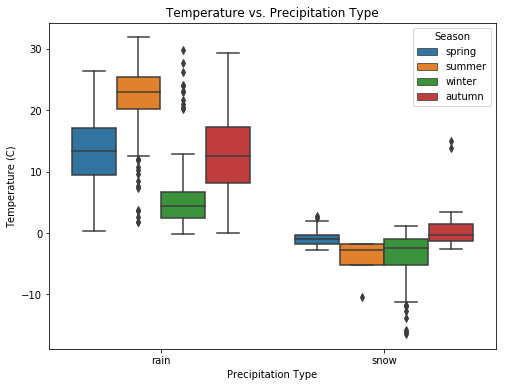

In [66]:
plt.figure(figsize=(8,6,))
temp_boxplot = sns.boxplot(x='Precipitation Type', y='Temperature (C)', hue='Season', data=data)
plt.title('Temperature vs. Precipitation Type')

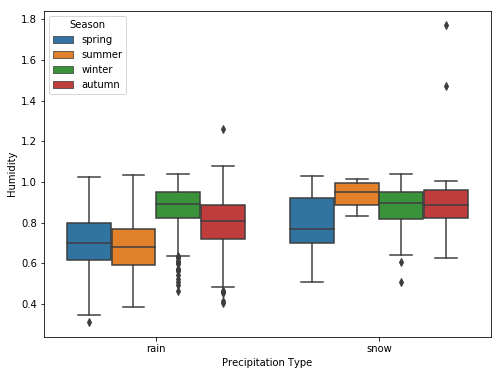

In [56]:
plt.figure(figsize=(8,6,))
temp_boxplot = sns.boxplot(x='Precipitation Type', y='Humidity', hue='Season', data=data)
plt.title('Humidity vs. Precipitation')

Text(0.5,1,'Wind Speed vs. Precipitation')

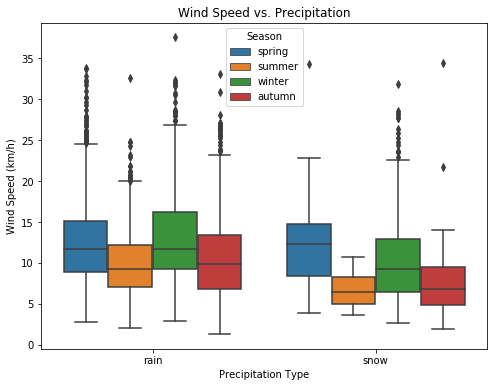

In [67]:
plt.figure(figsize=(8,6,))
temp_boxplot = sns.boxplot(x='Precipitation Type', y='Wind Speed (km/h)', hue='Season', data=data)
plt.title('Wind Speed vs. Precipitation')

### Pair Plots

Here we use SeaBorn's pair plot libraries in order to graph each variable vs. each other. 

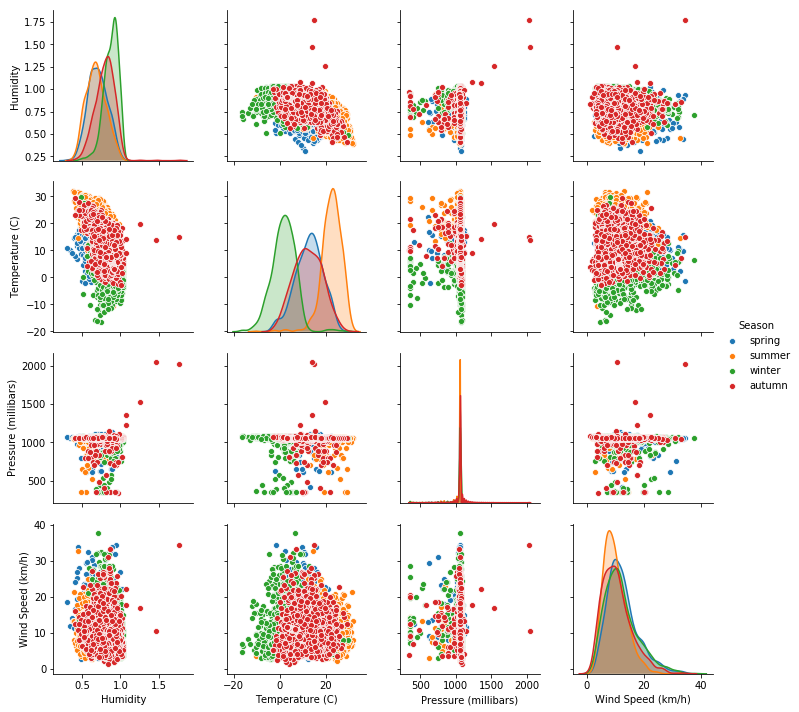

In [54]:
sns.pairplot(data=data, hue='Season')

### Distribution Plots

Creating distribution plots to show the distribution of all temperatures, humidity, and wind speeds. 

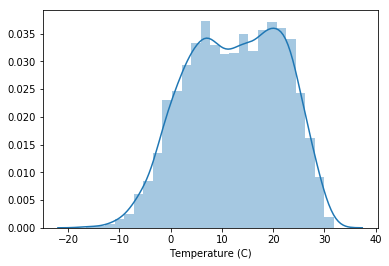

In [56]:
sns.distplot(data['Temperature (C)'])

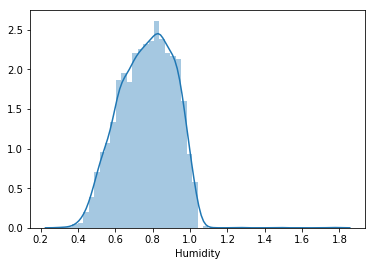

In [68]:
sns.distplot(data['Humidity'])

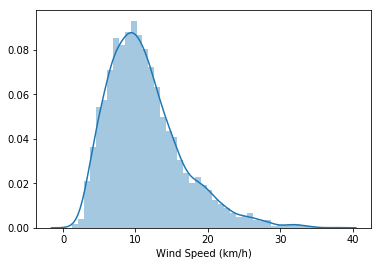

In [69]:
sns.distplot(data['Wind Speed (km/h)'])

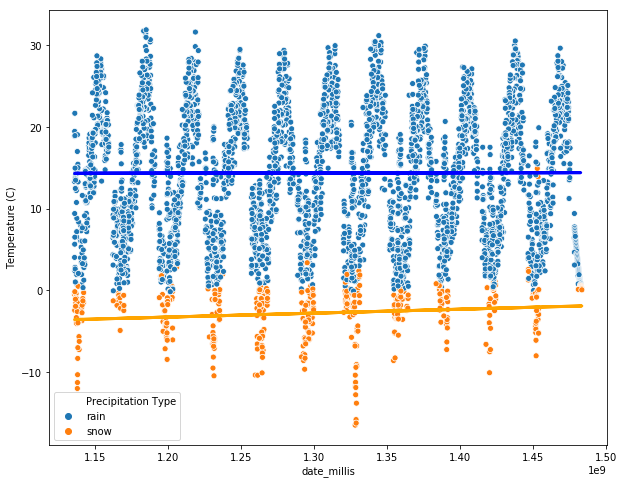

In [66]:
#create a column that represents the date in milliseconds
date_millis=[]
for index, row in data.iterrows():
    split = row['Date'].split('-')
    split[1]= split[1].replace("0","")
    split[2]= split[2].replace("0","")
    rejoin = split[1]+'/'+split[2]+'/'+(split[0])[2:]
    objDate = datetime.strptime(rejoin, '%m/%d/%y')
    date_millis.append(objDate.timestamp())
data['date_millis']=date_millis

#Create Linear Regression
plt.figure(figsize=(10,8,))
sns.scatterplot(x='date_millis', y='Temperature (C)', hue='Precipitation Type', data=data)
for p_type, df in data.groupby('Precipitation Type'):
    sub_X = [[x] for x in df['date_millis'].values]
    sub_Xvals = [[x] for x in df['Temperature (C)'].values]
    sub_lm= LinearRegression().fit(sub_X,sub_Xvals)
    prediction = sub_lm.predict(sub_X)
    if(p_type=='snow'):
        plt.plot(sub_X, prediction, linewidth=3,color = 'orange', label = p_type)
    if(p_type=='rain'):
        plt.plot(sub_X, prediction, linewidth=3,color = 'blue', label = p_type)
plt.show()